In [167]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import plotly as py
from plotly.offline import iplot
import plotly.graph_objs as go
import numpy as np
import colorlover as cl
from IPython.display import HTML
py.offline.init_notebook_mode(connected=True)

In [168]:
def imshow(img):
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_GRAY2RGB))

In [12]:
img_src=cv2.imread('test_img.bmp')
img_src=cv2.cvtColor(img_src,cv2.COLOR_BGR2RGB)

In [13]:
lx,ly,lz=img_src.shape
print(lx,ly,lz)
k1=min(lx,ly)//50
k2=k1//10
if k1 % 2 ==0:
    k1+=1
print(k1,k2)

5100 7020 3
103 10


In [349]:
img_src_zip=cv2.resize(img_src,(lx//(lx//1600),ly//(ly//900)))
print(img_src_zip.shape)

(1002, 1700, 3)


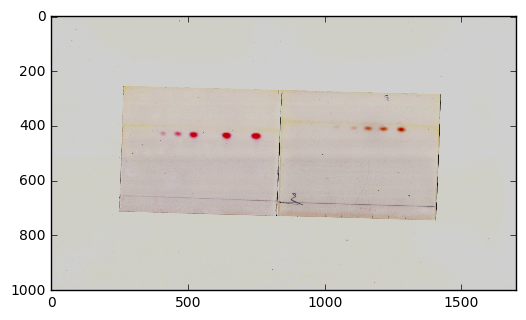

In [350]:
plt.imshow(img_src_zip)

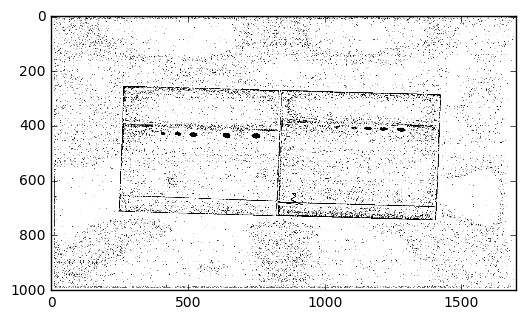

In [364]:
kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(7,7))
# img=cv2.cvtColor(img_src_zip,cv2.COLOR_BGR2RGB)
# Извлекаем канал красного цвета
img_gray=cv2.extractChannel(img_src_zip,2)
imshow(img_gray)
# img_gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
# _,img_gray=cv2.threshold(img_gray,250,255,cv2.THRESH_BINARY)
# Нормализуем изображение
img_gray=cv2.adaptiveThreshold(img_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,27,5)
imshow(img_gray)
# Эрозия и дилитация
img_gray=cv2.morphologyEx(img_gray,cv2.MORPH_CLOSE,kernel)
# Готовим к отображению
img=cv2.cvtColor(img_gray,cv2.COLOR_GRAY2RGB)

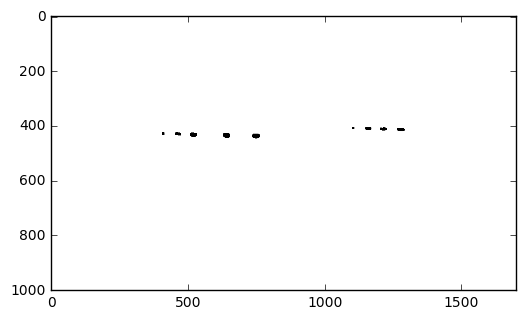

In [365]:
plt.imshow(img)

In [105]:
x=np.fromiter(range(0,365),dtype='int')
y=np.fromiter(range(0,283),dtype='int')
z=img_gray
z=np.invert(z)

In [183]:
circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT,29,1)
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    
    print('Завершено')
    print(len(circles))
else:
    print('Нечего не найдено')

Завершено
3


In [184]:
circles.shape

(3, 3)

In [187]:
output=img.copy()
# circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, 1.2, 50)

# ensure at least some circles were found
# convert the (x, y) coordinates and radius of the circles to integers


# loop over the (x, y) coordinates and radius of the circles
for (x, y, r) in circles:
    # draw the circle in the output image, then draw a rectangle
    # corresponding to the center of the circle
    cv2.circle(output, (x, y), r, (0, 255, 0), 1)
    cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

# show the output image
img_cicle=np.hstack([img, output])

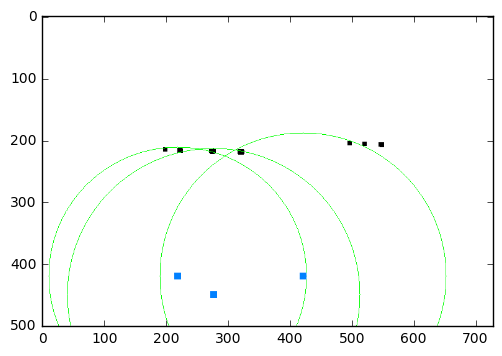

In [188]:
plt.imshow(output)

In [366]:
m2, contours, hierharchy=cv2.findContours(img_gray,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

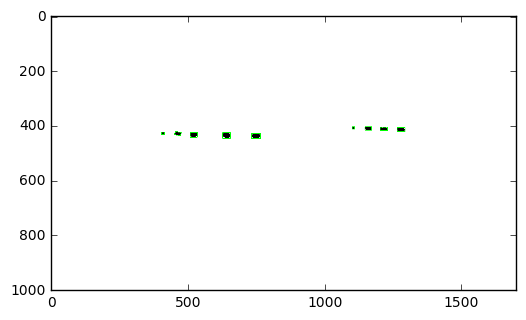

In [367]:
buf_img=img.copy()
cicles=[]
elements=[]
for cnt in contours[:-1]:
#     (x,y),radius=cv2.minEnclosingCircle(cnt)
#     x,y=int(x),int(y)
#     center=(x,y)
#     radius=int(radius)
#     cicles.append(img_gray[x-radius:x+radius,y-radius:y+radius])
#     img=cv2.circle(img,center,radius,(0,255,0),1)
    rect=cv2.minAreaRect(cnt)
    box=cv2.boxPoints(rect)
    box=np.int0(box)
    cv2.drawContours(buf_img,[box],0,(0,255,0),2)
    elements.append(box)
# draw=cv2.drawContours(buf_img, contours[:7], -1, (0,255,0), 3)
plt.imshow(buf_img)

In [265]:
elements

[array([[314, 225],
        [314, 215],
        [326, 215],
        [326, 225]], dtype=int64), array([[268, 224],
        [268, 214],
        [280, 214],
        [280, 224]], dtype=int64), array([[217, 222],
        [217, 213],
        [227, 213],
        [227, 222]], dtype=int64), array([[194, 220],
        [194, 212],
        [202, 212],
        [202, 220]], dtype=int64), array([[541, 213],
        [541, 204],
        [551, 204],
        [551, 213]], dtype=int64), array([[515, 211],
        [515, 203],
        [523, 203],
        [523, 211]], dtype=int64), array([[491, 210],
        [491, 202],
        [499, 202],
        [499, 210]], dtype=int64)]

In [272]:
img_src_zip[314:326,215:225,2]

array([[188, 188, 188, 182, 188, 188, 182, 188, 188, 182],
       [182, 182, 184, 180, 182, 182, 182, 188, 185, 188],
       [182, 182, 182, 182, 192, 188, 182, 182, 182, 182],
       [188, 189, 182, 195, 189, 184, 185, 185, 186, 185],
       [182, 182, 182, 182, 182, 182, 182, 184, 188, 182],
       [182, 187, 188, 182, 188, 182, 182, 182, 182, 188],
       [182, 182, 182, 182, 182, 182, 182, 182, 182, 182],
       [185, 182, 187, 182, 186, 187, 182, 188, 185, 182],
       [182, 187, 182, 182, 182, 182, 185, 182, 188, 182],
       [182, 182, 182, 182, 182, 182, 182, 178, 188, 182],
       [182, 182, 182, 187, 182, 182, 178, 170, 182, 182],
       [182, 182, 182, 188, 187, 182, 163, 182, 182, 182]], dtype=uint8)

In [368]:
box=elements[1]
x,y=box.min(0)
w,h=box.max(0)
print(x,y,w,h)
buf=cv2.cvtColor(img_src_zip,cv2.COLOR_RGB2GRAY)[y:h,x:w]
# buf=np.invert(buf)

626 428 654 449


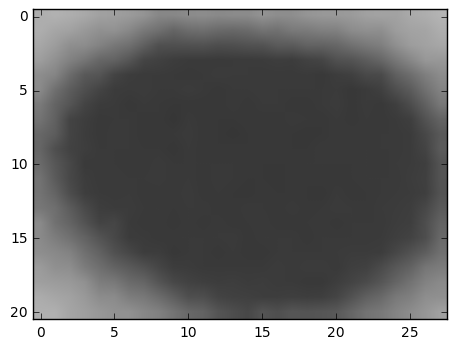

In [369]:
imshow(buf)

In [370]:
data=go.Surface(z=buf)
layout=go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig=go.Figure(data=[data],layout=layout)
iplot(fig)

In [371]:
s=buf.sum(1)
data=go.Scatter(y=s)
iplot([data])

In [372]:
area=s.sum()

In [373]:
area

49531

In [336]:
a.sum(1)

array([3, 7])